# A notebook to compare volumes and 3D positions of corridors and anatomical structures

# Import statements

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load corridor and AS volumes

In [3]:
corridor_volumes = pd.read_csv("output/corridor_volumes.csv")
corridor_volumes

table_s5 = pd.read_csv("../../../hra-pop/output-data/v0.10.2/reports/atlas/table-s5.csv")

# Wrangle the incoming data

In [4]:
# set scaling factor so we can convert from cubic millimeters to cubic meters
scaling_factor = 1e9

# select relevant columns from table s5
as_rearranged = table_s5[["organ", "as_label", "as_volume"]]

# create new column with AS label and organ as prefix
as_rearranged['label'] = as_rearranged['organ'] + \
    '__{' + as_rearranged['as_label'].astype(str)+"}"
as_rearranged['volume_mm^3'] = as_rearranged['as_volume']

# create new columns not present in original report 
as_rearranged.insert(loc=0, column='type', value="anatomical structure")
as_rearranged.insert(loc=2, column='volume_m^3',
                     value=as_rearranged['volume_mm^3'] * scaling_factor)

# select the columns we want (so that they match what we have for the corridors
as_volumes = as_rearranged[['type', 'label', 'volume_m^3', 'volume_mm^3']].drop_duplicates()
as_volumes

C:\Users\abueckle\AppData\Local\Temp\2\ipykernel_54548\459929264.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  as_rearranged['label'] = as_rearranged['organ'] + \
C:\Users\abueckle\AppData\Local\Temp\2\ipykernel_54548\459929264.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  as_rearranged['volume_mm^3'] = as_rearranged['as_volume']


,type,label,volume_m^3,volume_mm^3
0,anatomical structure,VHFHeart__{interventricular septum},6.589453e+13,65894.534659
1,anatomical structure,VHFHeart__{heart right ventricle},7.871476e+13,78714.755725
2,anatomical structure,VHFHeart__{Posteromedial head of posterior pap...,4.401499e+12,4401.498768
3,anatomical structure,VHFHeart__{heart left ventricle},2.293128e+14,229312.780188
4,anatomical structure,VHMHeart__{heart left ventricle},1.216042e+14,121604.207027
...,...,...,...,...
230,anatomical structure,VHMLeftUreter__{left ureter},1.685800e+12,1685.799762
231,anatomical structure,VHFSmallIntestine__{superior part of duodenum},6.614697e+12,6614.696747
232,anatomical structure,VHFSmallIntestine__{descending part of duodenum},4.498966e+12,4498.965832
237,anatomical structure,VHFLargeIntestine__{sigmoid colon},3.034371e+13,30343.709589


# Concatenate DataFrames

In [5]:
all_volumes = pd.concat([corridor_volumes, as_volumes])
all_volumes

,corridor_number,volume,type,label,volume_m^3,volume_mm^3
0,<OFFRoot>,7.143626e-07,NaN,NaN,NaN,NaN
1,<OFFRoot>.001,1.442908e-05,NaN,NaN,NaN,NaN
2,<OFFRoot>.002,2.399999e-06,NaN,NaN,NaN,NaN
3,<OFFRoot>.003,1.214973e-06,NaN,NaN,NaN,NaN
4,<OFFRoot>.004,1.562499e-05,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
230,NaN,NaN,anatomical structure,VHMLeftUreter__{left ureter},1.685800e+12,1685.799762
231,NaN,NaN,anatomical structure,VHFSmallIntestine__{superior part of duodenum},6.614697e+12,6614.696747
232,NaN,NaN,anatomical structure,VHFSmallIntestine__{descending part of duodenum},4.498966e+12,4498.965832
237,NaN,NaN,anatomical structure,VHFLargeIntestine__{sigmoid colon},3.034371e+13,30343.709589


# Export as CSV

In [35]:
all_volumes.to_csv("output/all_volumes.csv", index=False)

# Visualize

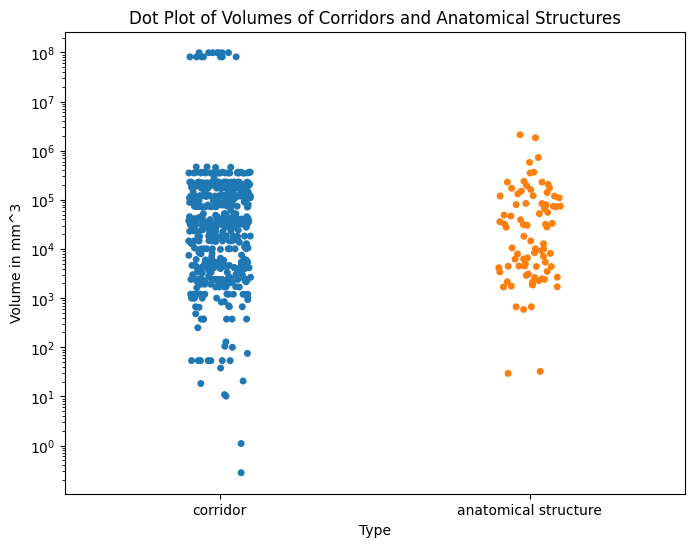

In [36]:
# As strip plot
plt.figure(figsize=(8, 6))
sns.stripplot(x='type', y='volume_mm^3', hue='type', data=all_volumes)
plt.title('Dot Plot of Volumes of Corridors and Anatomical Structures')
plt.yscale("log")
plt.xlabel('Type')
plt.ylabel('Volume in mm^3')
plt.show()